In [1]:
# pip install pandas

In [2]:
import pandas as pd
import numpy as np

In [3]:
housing = pd.read_csv(r"C:\Users\MSIGE65\Desktop\programming\Statistics & Machine Learning\Library\Hands on Machine Learning\Datasets\california housing prices\housing.csv")

In [4]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.shape

(20640, 10)

In [7]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [23]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [9]:
import seaborn as sns

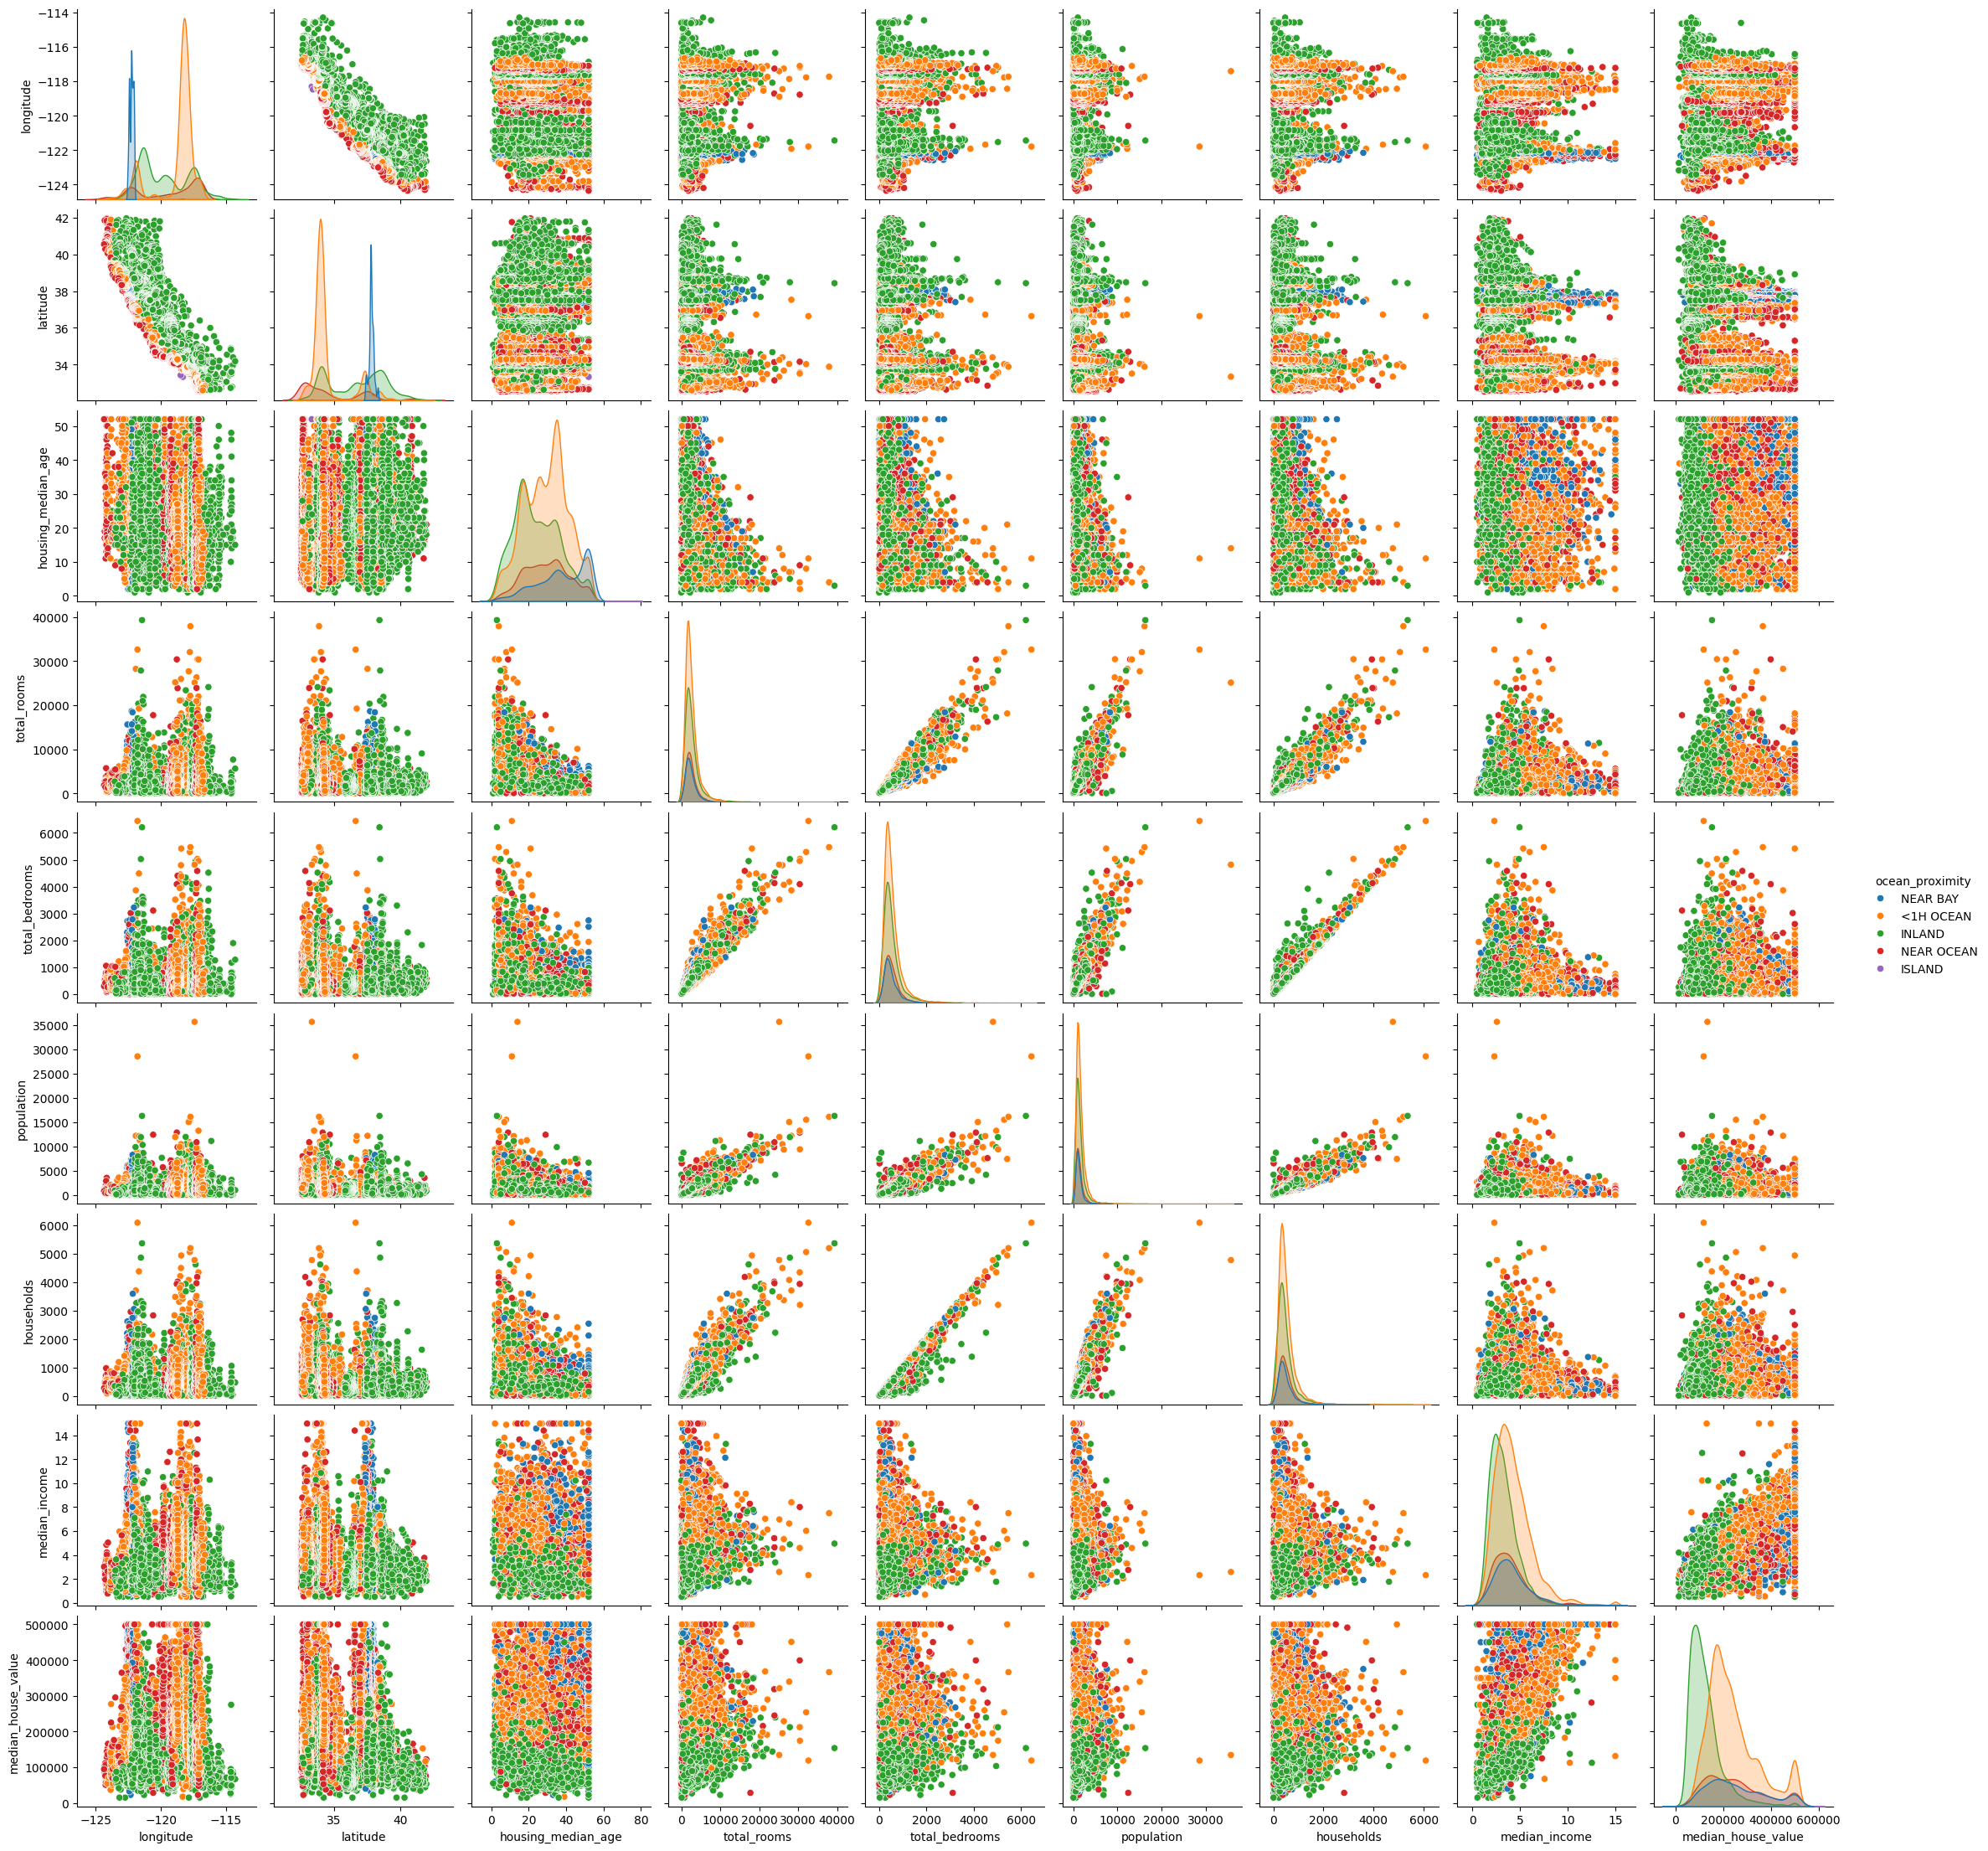

In [10]:
sns.pairplot(housing, hue='ocean_proximity')

In [11]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [12]:
import matplotlib.pyplot as plt

In [13]:
palette = sns.color_palette('deep', len(housing.ocean_proximity.unique()))

ocean_proximity_categories = housing.ocean_proximity.unique()

color_mapping = dict(zip(ocean_proximity_categories, palette))

fig, ax = plt.subplots(1,2, figsize=(12,6))
ocean_value = housing.ocean_proximity.value_counts()

explode = [0.1 if i==3 else 0 for i in range(len(ocean_value))]

ax[1].pie(ocean_value, labels=ocean_value.index, autopct='%.2f%%', 
          colors=[color_mapping[i] for i in ocean_value.index], explode=explode)
ax[1].set_title('Ocean_proximity wise Houses(Compare to the geography)')


sns.scatterplot(x='latitude', y='longitude', data=housing, hue='ocean_proximity', ax=ax[0], palette=color_mapping)
ax[0].set_title('Location wise House distribution depicting the Geography')
plt.show()

In [14]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [15]:
numerical_column = housing.select_dtypes('number').columns
categorical_column = housing.select_dtypes('object').columns

In [16]:
# Assuming that our data follows a normal curve:


for i in numerical_column:

    mean=np.mean(housing[i])
    std=np.std(housing[i])
    lower_threshold=mean-3*std
    upper_threshold=mean+3*std

    outlier=housing[(housing[i]<lower_threshold) | (housing[i]>upper_threshold)][i]

    if not outlier.empty:
        print(f'\nOutlier present in {i} are: \n\nindex\tValues\n\n{outlier}')
    else:
        print(f'\nThere are no outliers present in your {i} column')


There are no outliers present in your longitude column

There are no outliers present in your latitude column

There are no outliers present in your housing_median_age column

Outlier present in total_rooms are: 

index	Values

283      12842.0
570      18634.0
576      14316.0
780       9963.0
864      16199.0
          ...   
20451    25187.0
20529    10509.0
20530    15018.0
20563    12139.0
20629    10035.0
Name: total_rooms, Length: 373, dtype: float64

Outlier present in total_bedrooms are: 

index	Values

95       2477.0
104      1914.0
283      2048.0
508      2408.0
570      2885.0
          ...  
20530    3008.0
20543    1820.0
20544    1857.0
20563    2640.0
20629    1856.0
Name: total_bedrooms, Length: 370, dtype: float64

Outlier present in population are: 

index	Values

283      4985.0
570      7427.0
576      5781.0
780      5613.0
799      5436.0
          ...  
20529    5633.0
20530    7984.0
20544    6330.0
20563    6837.0
20629    6912.0
Name: population, Length: 3

In [17]:
housing.shape

(20640, 10)

In [18]:
fig, ax=plt.subplots(3,3,figsize=(12,8))
for i, j in enumerate(numerical_column):
    sns.boxplot(housing[j], ax=ax[i//3, i%3], orient='h')
    ax[i//3, i%3].set_title(f'Outlier in {j}')
plt.tight_layout()
plt.show()

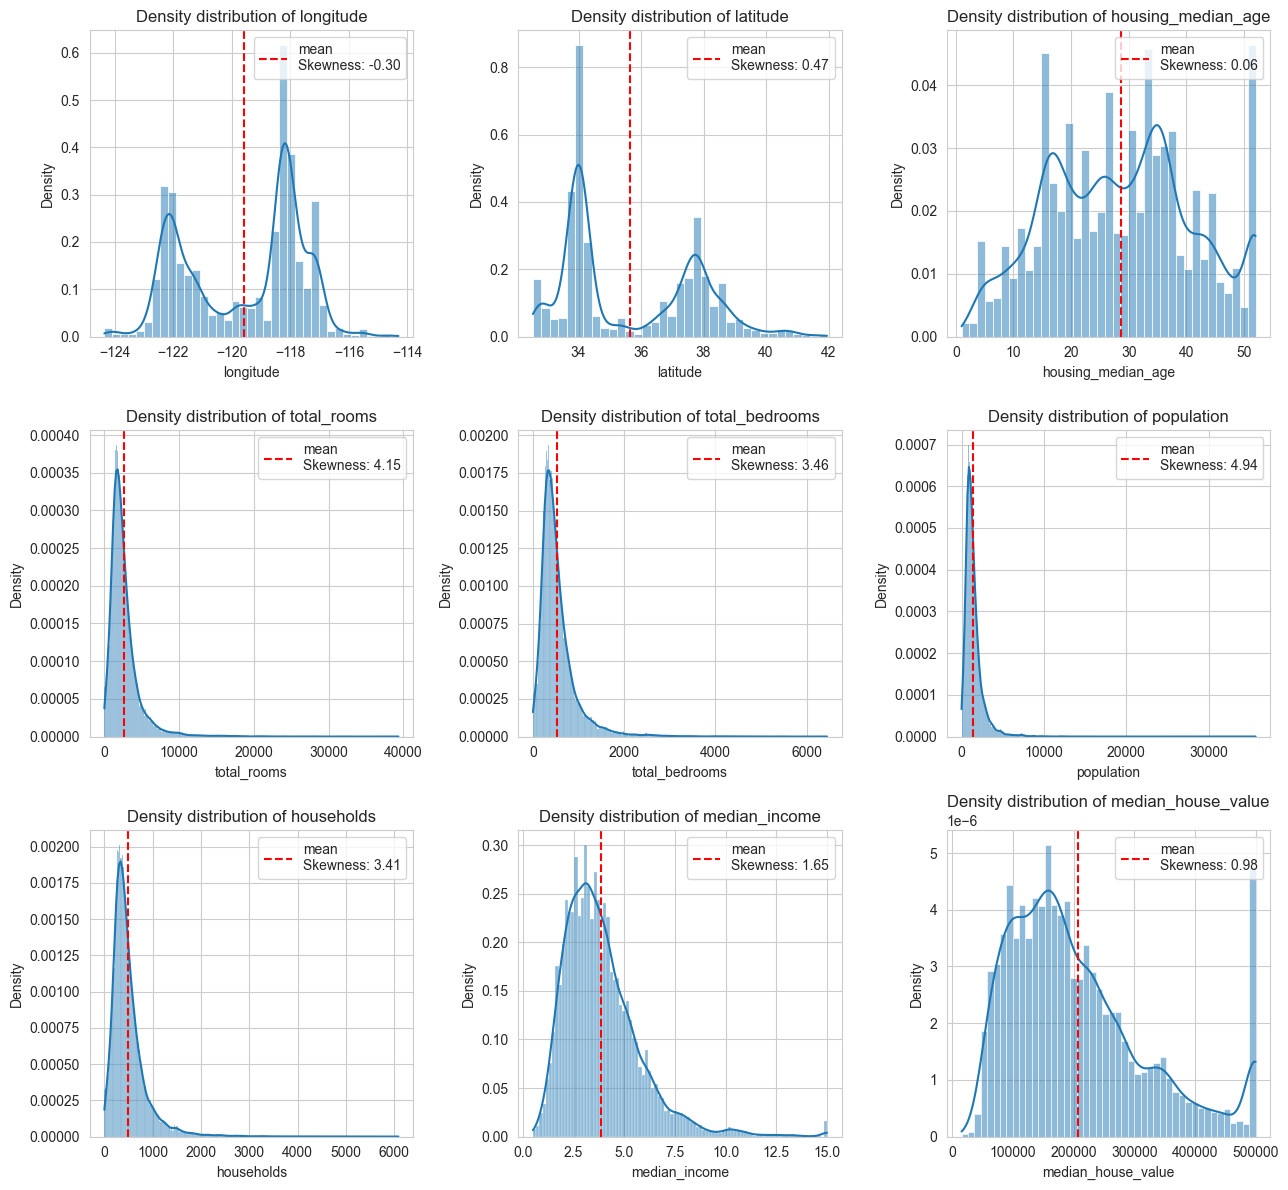

In [19]:
sns.set_style('whitegrid')
fig, ax=plt.subplots(3,3,figsize=(13,12))
for i, j in enumerate(numerical_column):
    sns.histplot(housing[j], ax=ax[i//3, i%3], stat='density', kde=True)
    ax[i//3, i%3].set_title(f'Density distribution of {j}')
    ax[i//3, i%3].axvline(housing[j].mean(), color='r', linestyle='--', label=f'mean\nSkewness: {housing[j].skew():.2f}')
    ax[i//3, i%3].legend(loc='upper right')

plt.tight_layout()
plt.show()

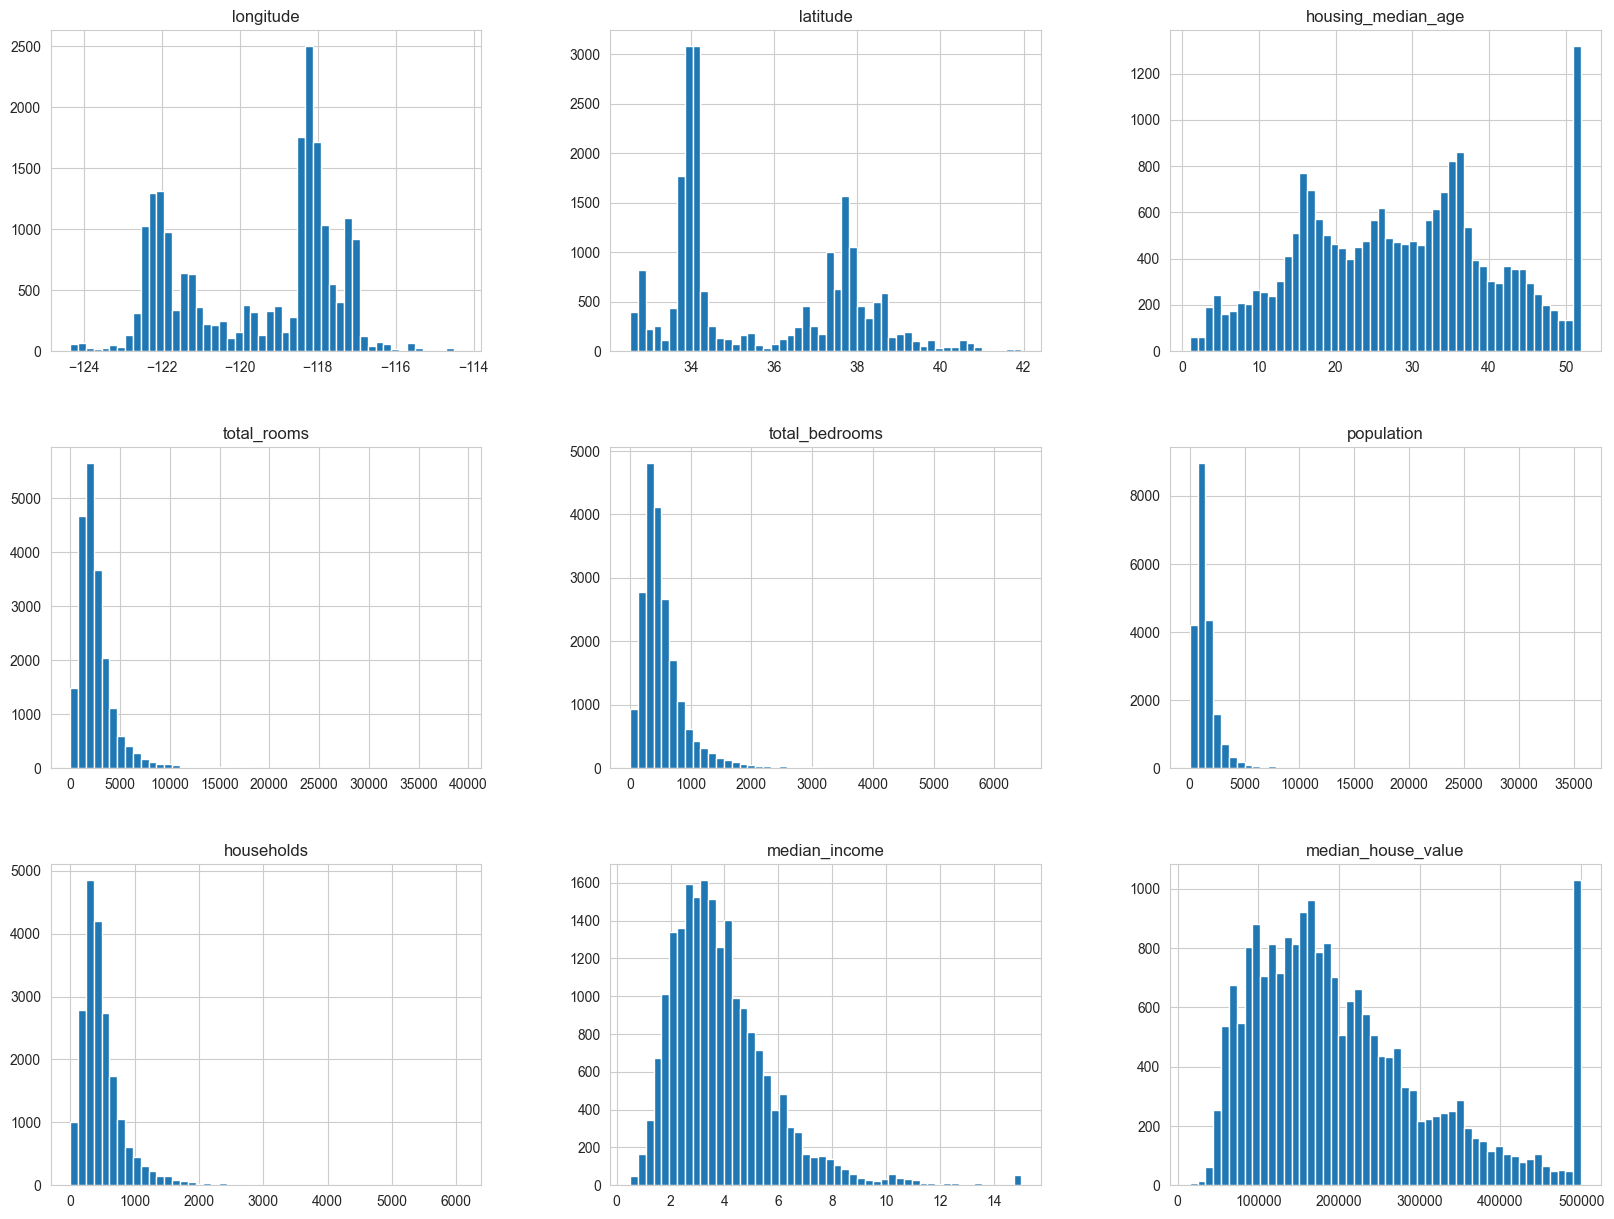

In [20]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()